# Notebook para hacer pruebas 

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime




In [21]:
# guardar en variable el dataset
df = pd.read_csv("data/dataset_eda.csv")
df


,USER ID,FIRST SEEN TIMESTAMP,COUNTRY,ATTRIBUTION CHANNEL,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,...,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
0,gnm6qjiAY2e7sBejh7EiQBpWZBJ3,2024-03-04T03:07:29.201Z,United States,Organic,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,1,1
1,Wlt9juveBehuBlKKVWgR3qkEVV52,2024-03-04T02:31:26.549Z,United States,Google Ads,1,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
2,ir27ubxNhoYwQwXO0eK6zYq9mAJ3,2024-03-04T06:16:04.500Z,United States,Google Ads,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
3,x837S9H2ufbRZXGUZ2jUmZq2oLf2,2024-03-04T11:00:36.658Z,Australia,Organic,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,wDisQWuU6cNbgLCpV1ZaVP7VVRA2,2024-03-04T12:30:44.841Z,South Africa,Organic,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,QtRTNhGrHROn023en6jPxaFspGK2,2024-03-12T00:37:27.297Z,United States,Google Ads,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,1
39996,5Af9WqbmihfeMUaQZAf6xF376Dd2,2024-03-12T01:00:11.388Z,United States,Partner Invite,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
39997,3Q7KCKy2kcSqJ1HX3wLdyu9YlAf2,2024-03-12T01:33:18.550Z,United States,Partner Invite,1,0,0,1,0,1,...,0,1,1,1,1,1,1,1,1,1
39998,fAOJQ2q8ahVOSoRcXXY9U3Gwm393,2024-03-12T01:47:06.804Z,United States,Google Ads,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


### Usuarios que empiezan el trial y los que convierten en base a los motivos seleccionados

In [22]:
# HIPOTESIS 1
# Lista de columnas con razones
reason_cols = [
    "COMMUNICATION_REASON",
    "CONFLICT_REASON",
    "CONNECTION_REASON",
    "FAMILY_AND_FRIENDS_REASON",
    "FUN_AND_EXCITEMENT_REASON",
    "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON",
    "MONEY_AND_FINANCES_REASON",
    "SEX_AND_INTIMACY_REASON"
]

### Ratio de conversión

# Calcular la tasa de conversión para cada razón (en formato decimal)
conversion_rates = df[reason_cols].mean().reset_index()
conversion_rates.columns = ["Reason", "Conversion Rate"]

# Convertir la tasa de conversión a porcentaje
conversion_rates["Conversion Rate"] = conversion_rates["Conversion Rate"] * 100

# Ordenar las razones por la tasa de conversión de mayor a menor
conversion_rates = conversion_rates.sort_values(by="Conversion Rate", ascending=False)

# Mostrar las tasas de conversión
print("Tasa de conversión por razón (%):")
print(conversion_rates)

# Calcular el ratio de conversión total (usuarios que seleccionaron al menos una razón) en porcentaje
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean() * 100

print(f"\nEl ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}%")


Tasa de conversión por razón (%):
                      Reason  Conversion Rate
2          CONNECTION_REASON          64.3100
0       COMMUNICATION_REASON          63.2250
4  FUN_AND_EXCITEMENT_REASON          56.4775
8    SEX_AND_INTIMACY_REASON          53.3825
6  MEANING_AND_GROWTH_REASON          50.4450
1            CONFLICT_REASON          43.9250
5       HOME_AND_WORK_REASON          29.7125
7  MONEY_AND_FINANCES_REASON          27.1300
3  FAMILY_AND_FRIENDS_REASON          26.4525

El ratio de conversión total (al menos una razón seleccionada) es: 86.10%


In [23]:

# Calcular el ratio de conversión total: usuarios que seleccionaron al menos una razón
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean()

print(f"El ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}")

El ratio de conversión total (al menos una razón seleccionada) es: 0.86


---

In [29]:
# HIPOTESIS 3, he decidido quitarla de las hipótesis del análisis principal porque me parece demasiado obvia y no creo que saque nada que me pueda servir para mis conclusiones. 
# La falta de interacción durante el trial de 7 días es directamente proporcional con la cancelación.
# cosas que he usado pero no tengo claro si me valen.

# Ver las columnas disponibles
print(df.columns)

# Ver la correlación entre interacción y conversión
interaction_cols = ["ENGAGED_WITH_PAIRING", "CODE_SHARED", "PAIRED_SECOND", "PAIRED_INITIATOR"]
correlation = df[interaction_cols + ["TRIAL_CONVERTED"]].corr()
print(correlation["TRIAL_CONVERTED"])


Index(['USER ID', 'FIRST SEEN TIMESTAMP', 'COUNTRY', 'ATTRIBUTION CHANNEL',
       'SIGNUP', 'ENGAGED_WITH_PAIRING', 'CODE_SHARED', 'PAIRED_SECOND',
       'PAIRED_INITIATOR', 'ONBOARDING_COMPLETED', 'CONVERSATION_OPENED',
       'CONVERSATION_ANSWERED', 'PHOTO_UPLOADED', 'TRIAL_STARTED',
       'TRIAL_CONVERTED', 'COMMUNICATION_REASON', 'CONFLICT_REASON',
       'CONNECTION_REASON', 'FAMILY_AND_FRIENDS_REASON',
       'FUN_AND_EXCITEMENT_REASON', 'HOME_AND_WORK_REASON',
       'MEANING_AND_GROWTH_REASON', 'MONEY_AND_FINANCES_REASON',
       'SEX_AND_INTIMACY_REASON', 'TOTAL_INTERACTIONS'],
      dtype='object')
ENGAGED_WITH_PAIRING    0.003275
CODE_SHARED             0.076983
PAIRED_SECOND           0.014027
PAIRED_INITIATOR        0.119002
TRIAL_CONVERTED         1.000000
Name: TRIAL_CONVERTED, dtype: float64


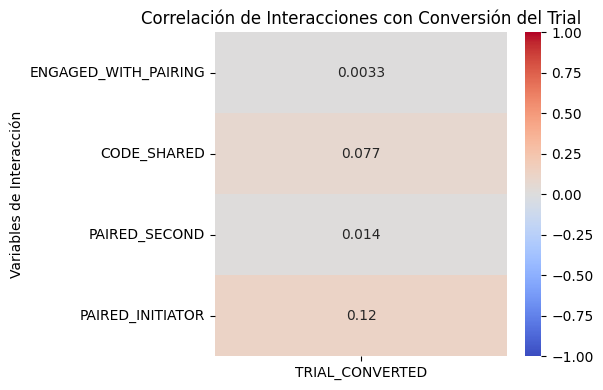

In [31]:
# Definir las columnas de interés
interaction_cols = ["ENGAGED_WITH_PAIRING", "CODE_SHARED", "PAIRED_SECOND", "PAIRED_INITIATOR"]
correlation = df[interaction_cols + ["TRIAL_CONVERTED"]].corr()

# Crear un heatmap solo de las correlaciones con TRIAL_CONVERTED
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation[["TRIAL_CONVERTED"]].loc[interaction_cols], 
    annot=True, cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Correlación de Interacciones con Conversión del Trial")
plt.ylabel("Variables de Interacción")
plt.tight_layout()
plt.show()

---